# PROJET DE MACHINE LEARNING 2

## Contenu

- Importation des librairies
- Chargement des données
- Prétraitement 
- Analyse des données
- Division du dataset
- Recherche du meilleur modele
- Recherche des hyperparametres
- Test du modele

## Importation des librairies

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")


##  Chargement des données

In [135]:
data = pd.read_csv('./data/Latest_Data_Science_Salaries.csv',sep=';')

In [136]:
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [137]:
data.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [138]:
data["Company Location"].value_counts()

United States             2495
United Kingdom             251
Canada                     104
Germany                     65
Spain                       47
                          ... 
Korea, Republic of           1
Armenia                      1
Andorra                      1
Bosnia and Herzegovina       1
Malta                        1
Name: Company Location, Length: 71, dtype: int64

## Pretraitement des données

### Données manquantes

In [139]:
data.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

Nous pouvons conclure ici qu'il n'y a pas de données manquantes

### Données Dupliquées

In [140]:
data.duplicated().sum()

0

Nous constatons egalement ici qu'il n'y a pas de données dupliquées

In [141]:
data["Company Location"].value_counts(normalize=True)

United States             0.756061
United Kingdom            0.076061
Canada                    0.031515
Germany                   0.019697
Spain                     0.014242
                            ...   
Korea, Republic of        0.000303
Armenia                   0.000303
Andorra                   0.000303
Bosnia and Herzegovina    0.000303
Malta                     0.000303
Name: Company Location, Length: 71, dtype: float64

array([[<Axes: title={'center': 'Salary'}>,
        <Axes: title={'center': 'Salary in USD'}>]], dtype=object)

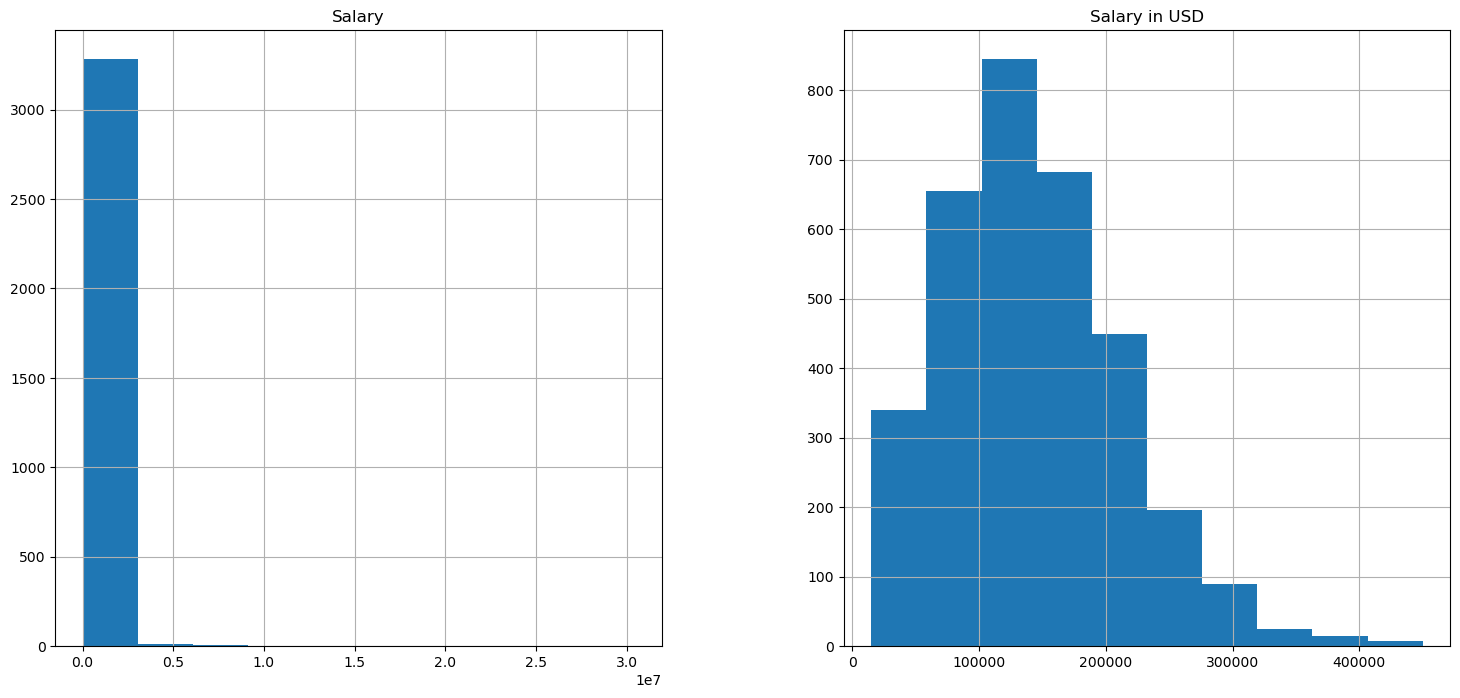

In [142]:
data[["Salary","Salary in USD"]].hist(figsize=(18,8))

## Analyse et Visualisation graphique

In [143]:
data.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [144]:
data.dtypes

Job Title             object
Employment Type       object
Experience Level      object
Expertise Level       object
Salary                 int64
Salary Currency       object
Company Location      object
Salary in USD          int64
Employee Residence    object
Company Size          object
Year                   int64
dtype: object

In [145]:
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [146]:
data.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [147]:
data.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [148]:
EmploymentTypeData = data.groupby(by="Employment Type")["Salary in USD"].mean()
EmploymentTypeData = pd.DataFrame(EmploymentTypeData)
EmploymentTypeData = EmploymentTypeData.reset_index()

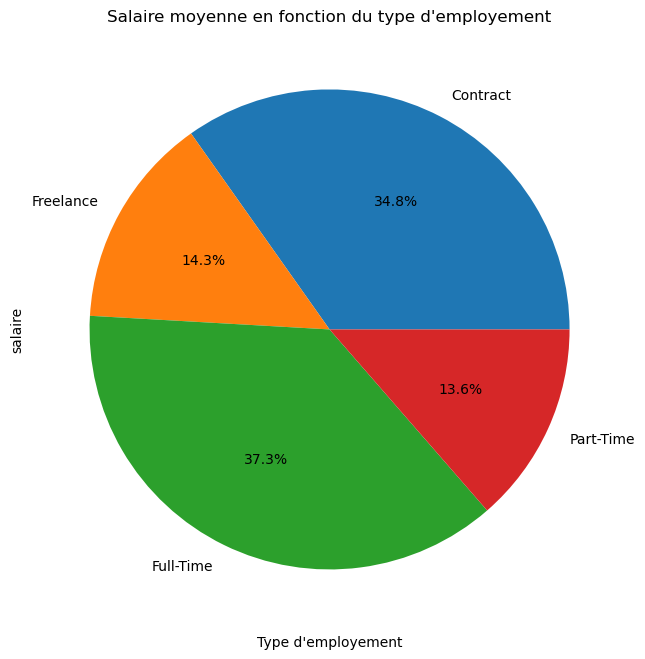

In [149]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.pie(EmploymentTypeData["Salary in USD"],labels=EmploymentTypeData["Employment Type"],autopct="%1.1f%%")
# ax.bar(EmploymentTypeData["Employment Type"],EmploymentTypeData["Salary"])
plt.xlabel("Type d'employement")
plt.ylabel('salaire')
plt.title("Salaire moyenne en fonction du type d'employement")
plt.show()

Les freelancers touchent plus en moyenne que les autres

In [150]:
ExperienceLevelData = data.groupby(by="Experience Level")["Salary in USD"].mean()
ExperienceLevelData = pd.DataFrame(ExperienceLevelData)
ExperienceLevelData = ExperienceLevelData.reset_index()
ExperienceLevelData

,Experience Level,Salary in USD
0,Entry,79921.479452
1,Executive,191512.143836
2,Mid,108714.977415
3,Senior,160277.513317


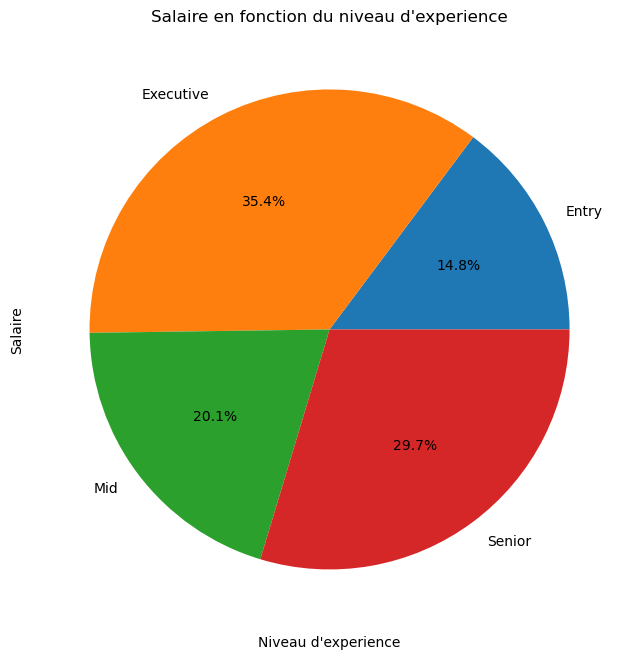

In [151]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_axes([0,0,1,1])
ax.pie(ExperienceLevelData["Salary in USD"],labels=ExperienceLevelData["Experience Level"],autopct="%1.1f%%")
plt.xlabel("Niveau d'experience")
plt.ylabel("Salaire")
plt.title("Salaire en fonction du niveau d'experience")
plt.show()

In [152]:
ExpertiseLevelData = data.groupby(by="Expertise Level")["Salary in USD"].mean()
ExpertiseLevelData = pd.DataFrame(ExpertiseLevelData)
ExpertiseLevelData = ExpertiseLevelData.reset_index()
ExpertiseLevelData

,Expertise Level,Salary in USD
0,Director,191512.143836
1,Expert,160277.513317
2,Intermediate,108714.977415
3,Junior,79921.479452


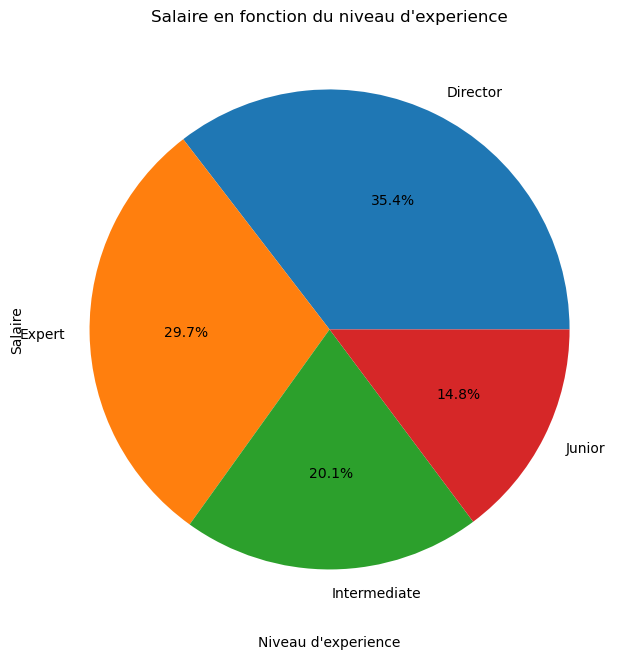

In [153]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_axes([0,0,1,1])
ax.pie(ExpertiseLevelData["Salary in USD"],labels=ExpertiseLevelData["Expertise Level"],autopct="%1.1f%%")
plt.xlabel("Niveau d'experience")
plt.ylabel("Salaire")
plt.title("Salaire en fonction du niveau d'experience")
plt.show()

In [154]:
YearSumData = data.groupby(by="Year")["Salary in USD"].sum()
YearSumData = pd.DataFrame(YearSumData)
YearSumData = YearSumData.reset_index()
YearSumData["Year"]=YearSumData["Year"].astype("int")
YearSumData

,Year,Salary in USD
0,2020,7524062
1,2021,21342278
2,2022,133463381
3,2023,306587026


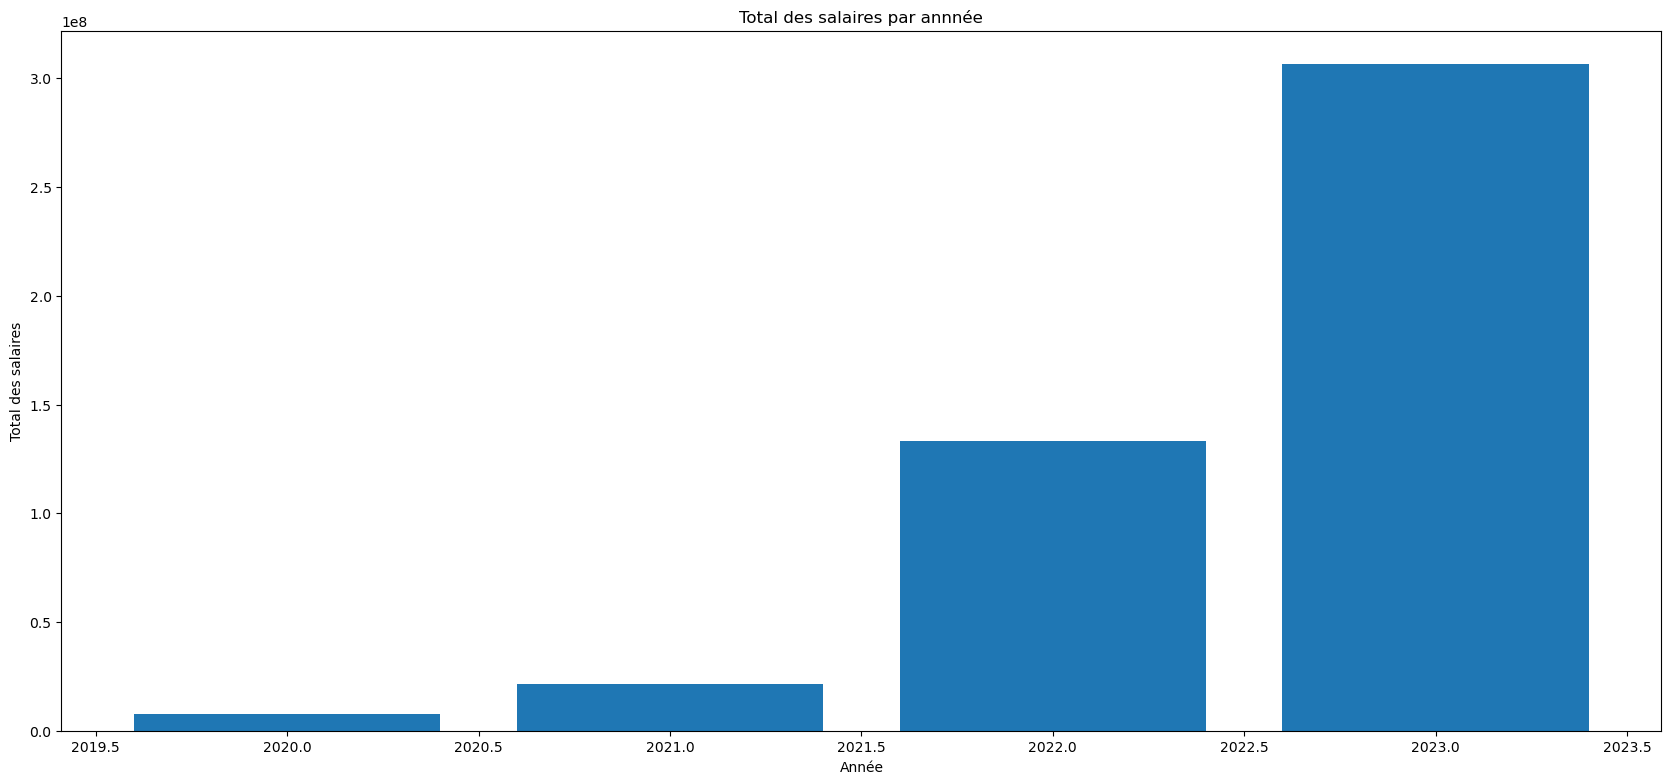

In [155]:
fig = plt.figure(figsize=(16,7))
ax= fig.add_axes([0,0,1,1])
ax.bar(YearSumData["Year"],YearSumData["Salary in USD"])

plt.xlabel('Année')
plt.ylabel("Total des salaires")
plt.title("Total des salaires par annnée")
plt.show()

## Transformation des données

### Reduction des données

In [156]:
def getColumns(data,columns):
    """
    Cette fonction permet de reduire les colonnes en ne gardant que les valeurs categorielles dont la cardinalité est inferieur ou egale à 4
    """
    listColumns = []
    for col in columns :
        # print("col {} ==> {}".format(col,len(data[col].unique())))
        # print(data[col].dtypes.name)
        if data[col].dtypes.name == 'object':
            if len(data[col].unique()) > 4:
                pass
            else : 
                listColumns.append(col)
        else : 
            listColumns.append(col)


    return listColumns

## Preprocessing

In [157]:
def preprocessing(df):
    """ 
        Cette methode permet de faire le preprocessing d'un dataset
    """
    # colsReturns = getColumns(df,df.columns)

    # newData = df[colsReturns]

    newData = pd.get_dummies(df)

    return newData

In [158]:
data.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [159]:
cols_to_encode = ['Experience Level', 'Expertise Level','Company Size','Year']

In [160]:
df = preprocessing(data)
df.head()

,Salary,Salary in USD,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
0,210000,210000,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,165000,165000,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,185900,185900,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,129300,129300,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,140000,140000,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Division des données

Nous allons diviser les données avec 80% pour l'entrainement et 20% pour le test

In [161]:
df.columns

Index(['Salary', 'Salary in USD', 'Year', 'Job Title_AI Architect',
       'Job Title_AI Developer', 'Job Title_AI Programmer',
       'Job Title_AI Scientist', 'Job Title_AWS Data Architect',
       'Job Title_Analytics Engineer',
       'Job Title_Analytics Engineering Manager',
       ...
       'Employee Residence_Turkey', 'Employee Residence_Ukraine',
       'Employee Residence_United Arab Emirates',
       'Employee Residence_United Kingdom', 'Employee Residence_United States',
       'Employee Residence_Uzbekistan', 'Employee Residence_Viet Nam',
       'Company Size_Large', 'Company Size_Medium', 'Company Size_Small'],
      dtype='object', length=305)

In [162]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelEnc = LabelEncoder()
# for cl in cols_to_encode:
#     df[cl] = labelEnc.fit_transform(data[cl])

In [163]:
df.head()

,Salary,Salary in USD,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
0,210000,210000,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,165000,165000,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,185900,185900,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,129300,129300,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,140000,140000,2023,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [164]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["Salary in USD","Year"], 1)
y = df[["Salary in USD"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [165]:
df_train = X_train.copy()
df_train["Salary"] = y_train
df_test = X_test.copy()
df_test["Salary"] = y_test
df_train.to_csv("./data/df_train.csv")
df_test.to_csv("./data/df_test.csv")


In [166]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [167]:
X_train_scaled

array([[0.02961276, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02277904, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02595292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01632498, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01290812, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04290053, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [168]:
X_train.loc[X_train.index ==57]

,Salary,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,Job Title_Applied Data Scientist,Job Title_Applied Machine Learning Engineer,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
57,225000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Model

### Evaluation d'un model

Ici nous allons écrire une methode qui evalue un modele


In [169]:

def get_model_score(model, X_test, y_test, metric='accuracy'):
    """
    Calcule le score d'un modèle en utilisant une métrique spécifiée.

    Arguments :
    - model : Le modèle entraîné
    - X_test : Les données de test (features)
    - y_test : Les étiquettes de test (valeurs cibles)
    - metric : La métrique d'évaluation souhaitée ('accuracy', 'precision', 'recall', 'f1')

    Retour :
    - Le score du modèle en utilisant la métrique spécifiée
    """
    y_pred = model.predict(X_test)
    
    if metric == 'accuracy':
        score = accuracy_score(y_test, y_pred)
    elif metric == 'precision':
        score = precision_score(y_test, y_pred)
    elif metric == 'recall':
        score = recall_score(y_test, y_pred)
    elif metric == 'f1':
        score = f1_score(y_test, y_pred)
    else:
        raise ValueError("Métrique d'évaluation non valide. Veuillez choisir parmi : 'accuracy', 'precision', 'recall', 'f1'.")
    
    return score


In [170]:
y_cols = "Salary in USD"
x_cols = ['Year', 'Employment Type_Contract',
       'Employment Type_Freelance', 'Employment Type_Full-Time',
       'Employment Type_Part-Time', 'Experience Level_Entry',
       'Experience Level_Executive', 'Experience Level_Mid',
       'Experience Level_Senior', 'Expertise Level_Director',
       'Expertise Level_Expert', 'Expertise Level_Intermediate',
       'Expertise Level_Junior', 'Company Size_Large', 'Company Size_Medium',
       'Company Size_Small']

In [171]:
X_train

,Salary,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,Job Title_Applied Data Scientist,Job Title_Applied Machine Learning Engineer,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
0,210000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,165000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,185900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,129300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,140000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,182160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2636,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2637,122500,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2638,100000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### La Regression Lineaire

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Créer une instance de modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Effectuer des prédictions sur les données de test
score = model.score(X_test_scaled,y_test)


score

-1.4298302195324695e+21

In [173]:
X_test

,Salary,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,Job Title_Applied Data Scientist,Job Title_Applied Machine Learning Engineer,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
2640,260000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2641,15000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2642,193000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2643,93000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2644,73000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,412000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3296,151000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3297,105000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3298,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Les arbres de decisions

Test du GridSearchCV sur 

In [174]:
### Recherche des meilleurs parametres


# Définir le modèle d'arbre de décision
from sklearn.tree import DecisionTreeRegressor


model_1 = DecisionTreeRegressor()

# Définir la grille des paramètres à tester
param_grid = {
    'max_depth': [5, 10, 15,100,200,300,400,500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(model_1, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

# Évaluer les performances du modèle avec les meilleurs paramètres sur l'ensemble de test
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Précision sur l'ensemble de test : ", accuracy)


Meilleurs paramètres :  {'max_depth': 500, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Meilleur score :  0.9746238484106605
Précision sur l'ensemble de test :  -0.9471869049188006


In [176]:
from sklearn.tree import DecisionTreeRegressor
model_arbre = DecisionTreeRegressor(max_depth=500,min_samples_leaf=2,min_samples_split=2,splitter='random',min_weight_fraction_leaf=0.0)
model_arbre.fit(X_train_scaled,y_train)
model_arbre.score(X_test_scaled,y_test)

-1.2314313561678287

In [177]:
model_arbre.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 500,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Test du BayesSearchCV sur DecisionTree

In [178]:
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV



# Créer un modèle de régression Ridge
model = DecisionTreeRegressor()

# Définir l'espace des hyperparamètres à rechercher (avec leurs plages)
param_dist = {
    'max_depth': (1, 500),  # Plage pour la profondeur maximale de l'arbre
    'min_samples_split': (2, 11),  # Plage pour le nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': (1, 11),  # Plage pour le nombre minimal d'échantillons pour être une feuille
}
# Créer un objet BayesSearchCV avec le modèle, l'espace des hyperparamètres et la méthode de validation croisée
bayes_search = BayesSearchCV(model, param_dist, cv=5, n_jobs=-1)

# Effectuer l'optimisation bayésienne sur les données d'entraînement
bayes_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", bayes_search.best_params_)
best_model = bayes_search.best_estimator_

# Faire des prédictions sur les données de test avec le meilleur modèle
predictions = best_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE) avec le meilleur modèle
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du meilleur modèle RidgeRegressor :", rmse)


Meilleurs hyperparamètres : OrderedDict([('max_depth', 81), ('min_samples_leaf', 1), ('min_samples_split', 6)])
RMSE du meilleur modèle RidgeRegressor : 101512.16779762215


In [179]:
model_arbre1 = DecisionTreeRegressor(max_depth=280,min_samples_leaf=4,min_samples_split=3,splitter='best',min_weight_fraction_leaf=0.0)
model_arbre1.fit(X_train_scaled,y_train)
model_arbre1.score(X_test_scaled,y_test)

-1.2197056014428331

In [180]:
from sklearn.metrics import r2_score

# Faire des prédictions sur les données de test
predictions = model_arbre.predict(X_test_scaled)

# Calculer le R²
r2 = r2_score(y_test, predictions)
print("R² du modèle de régression linéaire :", r2)


R² du modèle de régression linéaire : -1.2314313561678287


### Le SVM

In [181]:
from sklearn.svm import SVR

# Définir le modèle SVM
model = SVR()

# Définir la grille des paramètres à tester
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

# Évaluer les performances du modèle avec les meilleurs paramètres sur l'ensemble de test
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Précision sur l'ensemble de test : ", accuracy)


Meilleurs paramètres :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score :  0.02417347026215484
Précision sur l'ensemble de test :  0.024656366767985216


In [182]:
# Définir le modèle SVM
model_svm = SVR(C=1,kernel='linear',gamma='auto')
model_svm.fit(X_train_scaled,y_train)

SVR(C=1, gamma='auto', kernel='linear')

In [183]:
model_svm.score(X_test_scaled,y_test)

-0.15992960255164856

In [184]:
from sklearn.metrics import r2_score

# Faire des prédictions sur les données de test
predictions = model_svm.predict(X_test_scaled)

# Calculer le R²
r2 = r2_score(y_test, predictions)
print("R² du modèle de régression linéaire :", r2)


R² du modèle de régression linéaire : -0.15992960255164856


### Random Forest

RandomForest avec RandomizedCV

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np


# Définir la grille des hyperparamètres à rechercher
param_dist = {
    'max_depth': randint(1, 1000),  # Profondeur maximale de l'arbre
    'min_samples_split': randint(2, 11),  # Nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': randint(1, 11),  # Nombre minimal d'échantillons pour être une feuille
    'min_weight_fraction_leaf': np.linspace(0, 0.5, num=11),  # Fraction minimale du poids total pour être une feuille
}

# Créer un modèle DecisionTreeRegressor
dt_regressor = RandomForestRegressor()

# Créer un objet RandomizedSearchCV avec le modèle, la grille d'hyperparamètres et la méthode de validation croisée
random_search = RandomizedSearchCV(dt_regressor, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Effectuer la recherche aléatoire sur les données d'entraînement
random_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", random_search.best_params_)
best_model = random_search.best_estimator_


Meilleurs hyperparamètres : {'max_depth': 572, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0}


In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score



# Créer un modèle Random Forest
model_random = RandomForestRegressor(n_estimators=100,criterion='absolute_error',max_depth=572,min_samples_leaf=1,min_samples_split=3, min_weight_fraction_leaf=0.0)

# Entraîner le modèle sur les données d'entraînement
model_random.fit(X_train_scaled, y_train)




RandomForestRegressor(criterion='absolute_error', max_depth=572,
                      min_samples_split=3)

In [187]:
model_random.score(X_test_scaled,y_test)

-1.2644134622358694

In [188]:
score = model_random.score(X_test_scaled,y_test)
score*100

-126.44134622358693

In [189]:
from sklearn.metrics import r2_score

# Faire des prédictions sur les données de test
predictions = model_random.predict(X_test_scaled)

# Calculer le R²
r2 = r2_score(y_test, predictions)
print("R² du modèle de régression linéaire :", r2)


R² du modèle de régression linéaire : -1.2644134622358694


RandomForest   avec BayesCV

In [190]:
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV



# Créer un modèle de régression Ridge
model = RandomForestRegressor()

# Définir l'espace des hyperparamètres à rechercher (avec leurs plages)
param_dist = {
    'max_depth': (1, 500),  # Plage pour la profondeur maximale de l'arbre
    'min_samples_split': (2, 11),  # Plage pour le nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': (1, 11),  # Plage pour le nombre minimal d'échantillons pour être une feuille
}
# Créer un objet BayesSearchCV avec le modèle, l'espace des hyperparamètres et la méthode de validation croisée
bayes_search = BayesSearchCV(model, param_dist, cv=5, n_jobs=-1)

# Effectuer l'optimisation bayésienne sur les données d'entraînement
bayes_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", bayes_search.best_params_)
best_model = bayes_search.best_estimator_

# Faire des prédictions sur les données de test avec le meilleur modèle
predictions = best_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE) avec le meilleur modèle
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du meilleur modèle RidgeRegressor :", rmse)


Meilleurs hyperparamètres : OrderedDict([('max_depth', 500), ('min_samples_leaf', 1), ('min_samples_split', 8)])
RMSE du meilleur modèle RidgeRegressor : 99794.7264667326


In [191]:
# Créer un modèle Random Forest
model_random_1 = RandomForestRegressor(n_estimators=100,max_depth=197,min_samples_leaf=1,min_samples_split=11, min_weight_fraction_leaf=0.0)

# Entraîner le modèle sur les données d'entraînement
model_random_1.fit(X_train_scaled, y_train)
score = model_random_1.score(X_test_scaled,y_test)
score

-1.2550503076923492

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR


# Modèles à évaluer
# Créer une liste des modèles de régression à évaluer
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    AdaBoostRegressor()
]

# Effectuer une validation croisée en 5-fold pour chaque modèle
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Modèle: {model.__class__.__name__}")
    print(f"Scores de validation croisée : {scores}")
    print(f"Score moyen : {scores.mean()}\n")


Modèle: LinearRegression
Scores de validation croisée : [-5.30940685e+22 -2.21903563e+21 -8.33652052e+19 -1.64635911e+19
 -1.08143197e+21]
Score moyen : -1.129887297906874e+22

Modèle: Ridge
Scores de validation croisée : [0.39151908 0.44460492 0.37068785 0.36943223 0.30633076]
Score moyen : 0.37651496836308834

Modèle: Lasso
Scores de validation croisée : [ 0.53818486  0.49011092 -0.20058138 -2.23342738 -0.47787392]
Score moyen : -0.37671738006237987

Modèle: ElasticNet
Scores de validation croisée : [0.12869945 0.15881206 0.17743672 0.21732081 0.18518802]
Score moyen : 0.1734914119570004

Modèle: DecisionTreeRegressor
Scores de validation croisée : [0.92644888 0.99161641 0.88236618 0.99268206 0.99209216]
Score moyen : 0.9570411381443927

Modèle: RandomForestRegressor
Scores de validation croisée : [0.93152344 0.99046172 0.89656457 0.99097724 0.99078912]
Score moyen : 0.9600632176898142

Modèle: GradientBoostingRegressor
Scores de validation croisée : [0.94724811 0.99470671 0.91036245

In [193]:
# from sklearn.pipeline import Pipeline
# # Créer un pipeline avec une étape de mise à l'échelle (standardisation) et une étape Ridge Regression
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('ridge', Ridge())
# ])

# # Définir la grille des hyperparamètres à rechercher
# param_grid = {
#     'ridge__alpha': [0.01, 0.1, 1.0, 10.0]  # Valeurs possibles pour l'hyperparamètre alpha de Ridge
# }

# # Créer un objet GridSearchCV avec le modèle, la grille d'hyperparamètres et la méthode de validation croisée
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Effectuer la recherche de grille sur les données
# grid_search.fit(X_train, y_train)

# # Afficher les meilleurs hyperparamètres et le meilleur score RMSE
# print("Meilleurs hyperparamètres :", grid_search.best_params_)
# print("Meilleur RMSE :", (-grid_search.best_score_) ** 0.5)

In [194]:
grid_search.best_score_

0.02417347026215484

In [195]:
model_ridge = Ridge(alpha=15)
model_ridge.fit(X_train_scaled,y_train)
model_ridge.score(X_test_scaled,y_test)

0.48479647903250445

Test le BayesSearchCv sur Ridge

In [196]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV



# Créer un modèle de régression Ridge
model = Ridge()

# Définir l'espace des hyperparamètres à rechercher (avec leurs plages)
param_space = {
    'alpha': (0.01, 10.0, 'log-uniform'),  # Recherche de l'hyperparamètre alpha avec une échelle logarithmique
    'fit_intercept': (True, False),  # Recherche de l'hyperparamètre fit_intercept (True/False)
}

# Créer un objet BayesSearchCV avec le modèle, l'espace des hyperparamètres et la méthode de validation croisée
bayes_search = BayesSearchCV(model, param_space, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Effectuer l'optimisation bayésienne sur les données d'entraînement
bayes_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", bayes_search.best_params_)
best_model = bayes_search.best_estimator_

# Faire des prédictions sur les données de test avec le meilleur modèle
predictions = best_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE) avec le meilleur modèle
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du meilleur modèle RidgeRegressor :", rmse)


Meilleurs hyperparamètres : OrderedDict([('alpha', 1.1548088210840057), ('fit_intercept', False)])
RMSE du meilleur modèle RidgeRegressor : 58843.56100481764


In [197]:
model_ridge = Ridge(alpha=3.36,fit_intercept=False)
model_ridge.fit(X_train_scaled,y_train)
model_ridge.score(X_test_scaled,y_test)

0.43500874825388736

### Gradient Boosting Regressor

Test de GridSearchCV sur GradientBoostingRegressor

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 150,200],  # Nombre d'arbres dans l'ensemble (n_estimators)
    'learning_rate': [0.1, 0.05, 0.01],  # Taux d'apprentissage (learning_rate)
    'max_depth': [3, 5, 7]  # Profondeur maximale des arbres (max_depth)
}

# Créer un objet GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Créer un objet GridSearchCV avec le modèle, la grille d'hyperparamètres et la méthode de validation croisée
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche de grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Faire des prédictions sur les données de test avec le meilleur modèle
predictions = best_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE) avec le meilleur modèle
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du meilleur modèle GradientBoostingRegressor :", rmse)


Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
RMSE du meilleur modèle GradientBoostingRegressor : 15941.30826538677


In [199]:

# Créer un modèle GradientBoostingRegressor
model_grad = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42,max_depth=3)

# Entraîner le modèle sur les données d'entraînement
model_grad.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
predictions = model_grad.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du modèle GradientBoostingRegressor :", rmse)
model_grad.score(X_test_scaled,y_test)


RMSE du modèle GradientBoostingRegressor : 84444.53897298289


-1.1922121317982382

In [200]:
from sklearn.metrics import r2_score

# Faire des prédictions sur les données de test
predictions = model_grad.predict(X_test_scaled)

# Calculer le R²
r2 = r2_score(y_test, predictions)
print("R² du modèle de régression linéaire :", r2)


R² du modèle de régression linéaire : -1.1922121317982382


In [201]:
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV



# Créer un modèle de régression Ridge
model = GradientBoostingRegressor()

# Définir l'espace des hyperparamètres à rechercher (avec leurs plages)
param_dist = {
    'max_depth': (1, 500),  # Plage pour la profondeur maximale de l'arbre
    'min_samples_split': (2, 11),  # Plage pour le nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': (1, 11),  # Plage pour le nombre minimal d'échantillons pour être une feuille
    'n_estimators': [50, 100, 150,200],  # Nombre d'arbres dans l'ensemble (n_estimators)
    'learning_rate': [0.1, 0.05, 0.01],  # Taux d'apprentissage (learning_rate)
}
# Créer un objet BayesSearchCV avec le modèle, l'espace des hyperparamètres et la méthode de validation croisée
bayes_search = BayesSearchCV(model, param_dist, cv=5, n_jobs=-1)

# Effectuer l'optimisation bayésienne sur les données d'entraînement
bayes_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", bayes_search.best_params_)
best_model = bayes_search.best_estimator_

# Faire des prédictions sur les données de test avec le meilleur modèle
predictions = best_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE) avec le meilleur modèle
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du meilleur modèle RidgeRegressor :", rmse)


Meilleurs hyperparamètres : OrderedDict([('learning_rate', 0.1), ('max_depth', 323), ('min_samples_leaf', 9), ('min_samples_split', 2), ('n_estimators', 100)])
RMSE du meilleur modèle RidgeRegressor : 97634.80306393735


In [202]:

# Créer un modèle GradientBoostingRegressor
model_grad1 = GradientBoostingRegressor(n_estimators=1000,min_samples_leaf=1,max_depth=1000,min_samples_split=10, learning_rate=0.05, random_state=42)

# Entraîner le modèle sur les données d'entraînement
model_grad1.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
predictions = model_grad1.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du modèle GradientBoostingRegressor :", rmse)
model_grad1.score(X_test_scaled,y_test)


RMSE du modèle GradientBoostingRegressor : 100808.09474851338


-1.2990444559153884

In [203]:
X_train

,Salary,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,Job Title_Applied Data Scientist,Job Title_Applied Machine Learning Engineer,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
0,210000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,165000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,185900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,129300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,140000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,182160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2636,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2637,122500,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2638,100000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [204]:
model_grad.predict(X_test_scaled)

array([ 66685.96041991,  13225.0585181 ,  53761.75486177,  32365.78668196,
        27016.30847281,  44874.18911808,  35996.06738793,  26444.14681655,
        44874.18911808,  38378.51724261,  50658.54989704,  48444.61679492,
        30786.39941958,  32365.78668196,  58255.1872197 ,  44874.18911808,
        28314.39567816,  25146.0596112 ,  46775.31153493,  40509.63983913,
        48444.61679492,  44874.18911808,  27016.30847281,  32791.89099546,
        28314.39567816,  38910.75465082,  35833.53513101,  32791.89099546,
        28314.39567816,  38910.75465082,  35833.53513101,  38910.75465082,
        35833.53513101,  38378.51724261,  23267.25996673,  31063.62213467,
        27016.30847281,  24230.29426988,  31063.62213467,  56142.91064864,
        50658.54989704,  56142.91064864,  56142.91064864,  44874.18911808,
        66154.26774572,  26460.38396794,  40212.91919811,  38910.75465082,
        39205.24838643,  32365.78668196,  27016.30847281,  38378.51724261,
        50658.54989704,  

In [205]:
y_test

,Salary in USD
2640,260000
2641,15000
2642,193000
2643,93000
2644,73000
...,...
3295,412000
3296,151000
3297,105000
3298,100000


In [206]:
from catboost import CatBoostRegressor


# Créer un modèle CatBoostRegressor
model_cat = CatBoostRegressor(iterations=500, depth=16, learning_rate=0.3)

# Entraîner le modèle sur les données d'entraînement
model_cat.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
predictions = model_cat.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du modèle CatBoostRegressor :", rmse)


0:	learn: 51672.2104509	total: 1.99s	remaining: 16m 35s
1:	learn: 39201.0604357	total: 2.44s	remaining: 10m 8s
2:	learn: 30092.0355258	total: 4.17s	remaining: 11m 31s
3:	learn: 23937.8784818	total: 5.88s	remaining: 12m 8s
4:	learn: 19011.5534388	total: 7.68s	remaining: 12m 40s
5:	learn: 15889.3515612	total: 7.72s	remaining: 10m 35s
6:	learn: 13348.0569949	total: 9.64s	remaining: 11m 18s
7:	learn: 11997.8339113	total: 9.65s	remaining: 9m 53s
8:	learn: 10532.6876915	total: 11.8s	remaining: 10m 41s
9:	learn: 9488.3455394	total: 12s	remaining: 9m 49s
10:	learn: 9273.7243355	total: 12.2s	remaining: 9m
11:	learn: 8468.5980409	total: 12.3s	remaining: 8m 19s
12:	learn: 8285.2081398	total: 12.6s	remaining: 7m 52s
13:	learn: 7712.2807018	total: 14.6s	remaining: 8m 27s
14:	learn: 7262.0204172	total: 16.6s	remaining: 8m 58s
15:	learn: 7089.2826113	total: 18.4s	remaining: 9m 16s
16:	learn: 6576.3201342	total: 20.4s	remaining: 9m 40s
17:	learn: 6446.8047755	total: 20.7s	remaining: 9m 13s
18:	learn: 

In [207]:
model_cat.score(X_test_scaled,y_test)

-1400.8408609565738

### XgbRegressor


In [208]:
import xgboost as xgb


# Créer un modèle XGBRegressor
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
predictions = model.predict(X_test_scaled)




In [209]:
model.score(X_test_scaled,y_test)

-1.1122159882688964

In [210]:
from sklearn.metrics import mean_squared_error



# Créer un modèle de régression Ridge
model_xgb = xgb.XGBRegressor()

# Définir l'espace des hyperparamètres à rechercher (avec leurs plages)
param_dist = {
    'max_depth': (1, 500),  # Plage pour la profondeur maximale de l'arbre
    'min_samples_split': (2, 11),  # Plage pour le nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': (1, 11),  # Plage pour le nombre minimal d'échantillons pour être une feuille
    'n_estimators': [50, 100, 150,200],  # Nombre d'arbres dans l'ensemble (n_estimators)
    'learning_rate': [0.1, 0.05, 0.01],  # Taux d'apprentissage (learning_rate)
}
# Créer un objet BayesSearchCV avec le modèle, l'espace des hyperparamètres et la méthode de validation croisée
bayes_search = GridSearchCV(model_xgb, param_dist, cv=5, n_jobs=-1)

# Effectuer l'optimisation bayésienne sur les données d'entraînement
bayes_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score RMSE
print("Meilleurs hyperparamètres :", bayes_search.best_params_)
best_model = bayes_search.best_estimator_

# Faire des prédictions sur les données de test avec le meilleur modèle
predictions = best_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE) avec le meilleur modèle
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE du meilleur modèle RidgeRegressor :", rmse)


[10:29:30] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 500, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RMSE du meilleur modèle RidgeRegressor : 98782.6779066836


In [211]:
model_xgb = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=500)
model_xgb.fit(X_train_scaled,y_train)
model_xgb.score(X_test_scaled,y_test)

-1.1890488416701448

In [214]:
X_train.shape

(2640, 303)

In [215]:
y_train.shape

(2640, 1)